**This code is for importing market_data_cleaned_no_commas.csv, and then:**

A. divide it into 3 smaller dfs as below:


1) pre-process 4 columns with pct_change() = PERCENTAGE change 
2) pre-process 10 columns with diff() = ABSOLUTE change 
3) pre-process VIX data differently, because it requires separate calculation (pls refer to https://www.spglobal.com/spdji/en/vix-intro/#:~:text=Simply%20put%2C%20VIX%20measures%20the,options%20on%20the%20S%26P%20500.) 


B. join all 3 small dfs and build a big beautiful df for market_data_final 

# Importing packages and mounting Google Drive

In [1]:
# import requests
import pandas as pd
import numpy as np 

In [2]:
# Import Drive API and authenticate.
from google.colab import drive
# Mount your Drive to the Colab VM.
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
list_of_dfs = list() 


# Importing initial dataset

In [3]:
###  I wouldn't rather use def function for market_data cleaning, as it may be bit tricky
###  I will rather clean and process data, step by step 

# def load_benchmarks(path_to_file):
# reading the big df with all assets

market_data = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/CSV data files/Market_Data_cleaned_no_commas.csv') 
market_data



,Date,Inflation_CPI,Inflation_PCE,VIX,10yr_bond,Fed_funds_rate,2yr_bond,Inflations_expectations,Inflation_surprises,Economic_surprises,Umichigan_survey,ISM_Manufacturing,Hourly_earnings,MS_Market_Sentiment,SPX,NASDAQ
0,01-03-00,0.2,0.2,24.21,6.59,5.50,6.38,NaN,-6.88,0.05,105.4,57.8,NaN,NaN,1455.22,4131.15
1,01-04-00,0.2,0.2,27.01,6.50,5.50,6.30,NaN,-6.88,0.05,105.4,57.8,NaN,NaN,1399.42,3901.69
2,01-05-00,0.2,0.2,26.41,6.59,5.50,6.36,NaN,-6.88,0.09,105.4,57.8,NaN,NaN,1402.11,3877.54
3,01-06-00,0.2,0.2,25.73,6.52,5.50,6.30,NaN,-6.88,0.00,105.4,57.8,NaN,NaN,1403.45,3727.13
4,01-07-00,0.2,0.2,21.72,6.52,5.50,6.31,NaN,-6.88,0.08,105.4,57.8,NaN,NaN,1441.47,3882.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5927,09-21-2022,0.1,-0.1,27.99,3.53,3.25,4.05,5.75,26.53,-0.15,58.2,52.8,5.2,-0.51,3789.93,11220.19
5928,09-22-2022,0.1,-0.1,27.35,3.71,3.25,4.12,5.75,26.53,-0.16,58.2,52.8,5.2,-0.62,3757.99,11066.80
5929,09-23-2022,0.1,-0.1,29.92,3.68,3.25,4.20,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93
5930,09-26-2022,0.1,-0.1,32.26,3.92,3.25,4.34,5.75,26.53,-0.16,58.2,52.8,5.2,-0.86,3655.04,10802.92


In [4]:
ff_df = market_data.copy()
ff_df['Date'] = ff_df['Date'].astype('datetime64[ns]')
ff_df = ff_df.set_index('Date')

ff_df  

,Inflation_CPI,Inflation_PCE,VIX,10yr_bond,Fed_funds_rate,2yr_bond,Inflations_expectations,Inflation_surprises,Economic_surprises,Umichigan_survey,ISM_Manufacturing,Hourly_earnings,MS_Market_Sentiment,SPX,NASDAQ
Date,,,,,,,,,,,,,,,
2000-01-03,0.2,0.2,24.21,6.59,5.50,6.38,NaN,-6.88,0.05,105.4,57.8,NaN,NaN,1455.22,4131.15
2000-01-04,0.2,0.2,27.01,6.50,5.50,6.30,NaN,-6.88,0.05,105.4,57.8,NaN,NaN,1399.42,3901.69
2000-01-05,0.2,0.2,26.41,6.59,5.50,6.36,NaN,-6.88,0.09,105.4,57.8,NaN,NaN,1402.11,3877.54
2000-01-06,0.2,0.2,25.73,6.52,5.50,6.30,NaN,-6.88,0.00,105.4,57.8,NaN,NaN,1403.45,3727.13
2000-01-07,0.2,0.2,21.72,6.52,5.50,6.31,NaN,-6.88,0.08,105.4,57.8,NaN,NaN,1441.47,3882.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-21,0.1,-0.1,27.99,3.53,3.25,4.05,5.75,26.53,-0.15,58.2,52.8,5.2,-0.51,3789.93,11220.19
2022-09-22,0.1,-0.1,27.35,3.71,3.25,4.12,5.75,26.53,-0.16,58.2,52.8,5.2,-0.62,3757.99,11066.80
2022-09-23,0.1,-0.1,29.92,3.68,3.25,4.20,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93


In [5]:
min_date = ff_df.index.min()
max_date = ff_df.index.max()
date_list = pd.date_range(min_date, max_date, freq="D")

ff_df = ff_df.reindex(date_list).ffill() 

# test_df = test_df.fillna(method='ffill') 
ff_df

,Inflation_CPI,Inflation_PCE,VIX,10yr_bond,Fed_funds_rate,2yr_bond,Inflations_expectations,Inflation_surprises,Economic_surprises,Umichigan_survey,ISM_Manufacturing,Hourly_earnings,MS_Market_Sentiment,SPX,NASDAQ
2000-01-03,0.2,0.2,24.21,6.59,5.50,6.38,NaN,-6.88,0.05,105.4,57.8,NaN,NaN,1455.22,4131.15
2000-01-04,0.2,0.2,27.01,6.50,5.50,6.30,NaN,-6.88,0.05,105.4,57.8,NaN,NaN,1399.42,3901.69
2000-01-05,0.2,0.2,26.41,6.59,5.50,6.36,NaN,-6.88,0.09,105.4,57.8,NaN,NaN,1402.11,3877.54
2000-01-06,0.2,0.2,25.73,6.52,5.50,6.30,NaN,-6.88,0.00,105.4,57.8,NaN,NaN,1403.45,3727.13
2000-01-07,0.2,0.2,21.72,6.52,5.50,6.31,NaN,-6.88,0.08,105.4,57.8,NaN,NaN,1441.47,3882.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-23,0.1,-0.1,29.92,3.68,3.25,4.20,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93
2022-09-24,0.1,-0.1,29.92,3.68,3.25,4.20,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93
2022-09-25,0.1,-0.1,29.92,3.68,3.25,4.20,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93
2022-09-26,0.1,-0.1,32.26,3.92,3.25,4.34,5.75,26.53,-0.16,58.2,52.8,5.2,-0.86,3655.04,10802.92


In [8]:
ff_df.to_csv('/content/gdrive/My Drive/ML540 - Blue Clusters/datafiles/market_data_ffill.csv')  


# Metrics for PERCENTAGE change 

**pct_df pre-processing**

In [ ]:
# pct_df pre-processing 
pct_columns = ['Date', 'Umichigan_survey', 'ISM_Manufacturing', 'SPX', 'NASDAQ'] 
pct_df = market_data[pct_columns]

pct_df['Date'] = pct_df['Date'].astype('datetime64[ns]')
pct_df.set_index('Date', inplace=True) 

pct_df = pct_df.reindex(pd.date_range(pct_df.index.min(), pct_df.index.max())).sort_index(ascending=True).reset_index().rename(columns={'index': 'Date'})
pct_df = pct_df.fillna(method='ffill')
pct_df.set_index('Date', inplace=True) 

pct_df 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Umichigan_survey,ISM_Manufacturing,SPX,NASDAQ
Date,,,,
2000-01-03,105.4,57.8,1455.22,4131.15
2000-01-04,105.4,57.8,1399.42,3901.69
2000-01-05,105.4,57.8,1402.11,3877.54
2000-01-06,105.4,57.8,1403.45,3727.13
2000-01-07,105.4,57.8,1441.47,3882.62
...,...,...,...,...
2022-09-23,58.2,52.8,3693.23,10867.93
2022-09-24,58.2,52.8,3693.23,10867.93
2022-09-25,58.2,52.8,3693.23,10867.93


In [ ]:
# adding +_change columns with pct_change()

for col in pct_df.columns :
  pct_df[col + "_change"] = pct_df[col].pct_change()

pct_df.drop(columns = pct_columns[1:], inplace=True)

list_of_dfs.append(pct_df) 


pct_df 

,Umichigan_survey_change,ISM_Manufacturing_change,SPX_change,NASDAQ_change
Date,,,,
2000-01-03,NaN,NaN,NaN,NaN
2000-01-04,0.0,0.0,-0.038345,-0.055544
2000-01-05,0.0,0.0,0.001922,-0.006190
2000-01-06,0.0,0.0,0.000956,-0.038790
2000-01-07,0.0,0.0,0.027090,0.041718
...,...,...,...,...
2022-09-23,0.0,0.0,-0.017233,-0.017970
2022-09-24,0.0,0.0,0.000000,0.000000
2022-09-25,0.0,0.0,0.000000,0.000000


# Metrics for ABSOLUTE change

**abs_df pre-processing**

In [ ]:
# abs_df pre-processing
abs_columns = ['Date', 'Inflation_CPI', 'Inflation_PCE', '10yr_bond', 'Fed_funds_rate', '2yr_bond', 'Inflations_expectations', 'Inflation_surprises', 'Economic_surprises', 'Hourly_earnings', 'MS_Market_Sentiment'] 
abs_df = market_data[abs_columns] 

abs_df['Date'] = abs_df['Date'].astype('datetime64[ns]')
abs_df.set_index('Date', inplace=True) 

abs_df = abs_df.reindex(pd.date_range(abs_df.index.min(), abs_df.index.max())).sort_index(ascending=True).reset_index().rename(columns={'index': 'Date'})
abs_df = abs_df.fillna(method='ffill')
abs_df.set_index('Date', inplace=True) 

abs_df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Inflation_CPI,Inflation_PCE,10yr_bond,Fed_funds_rate,2yr_bond,Inflations_expectations,Inflation_surprises,Economic_surprises,Hourly_earnings,MS_Market_Sentiment
Date,,,,,,,,,,
2000-01-03,0.2,0.2,6.59,5.50,6.38,NaN,-6.88,0.05,NaN,NaN
2000-01-04,0.2,0.2,6.50,5.50,6.30,NaN,-6.88,0.05,NaN,NaN
2000-01-05,0.2,0.2,6.59,5.50,6.36,NaN,-6.88,0.09,NaN,NaN
2000-01-06,0.2,0.2,6.52,5.50,6.30,NaN,-6.88,0.00,NaN,NaN
2000-01-07,0.2,0.2,6.52,5.50,6.31,NaN,-6.88,0.08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-09-23,0.1,-0.1,3.68,3.25,4.20,5.75,26.53,-0.16,5.2,-0.75
2022-09-24,0.1,-0.1,3.68,3.25,4.20,5.75,26.53,-0.16,5.2,-0.75
2022-09-25,0.1,-0.1,3.68,3.25,4.20,5.75,26.53,-0.16,5.2,-0.75


In [ ]:
# adding +_change columns with ABSOLUTE_change()

for col in abs_df.columns :
  # abs_df[col] = abs_df[col].astype('float64')
  abs_df[col] = abs_df[col].div(100)
  abs_df[col + "_change"] = abs_df[col].diff()

abs_df.drop(columns = abs_columns[1:], inplace=True)

list_of_dfs.append(abs_df) 

abs_df 

,Inflation_CPI_change,Inflation_PCE_change,10yr_bond_change,Fed_funds_rate_change,2yr_bond_change,Inflations_expectations_change,Inflation_surprises_change,Economic_surprises_change,Hourly_earnings_change,MS_Market_Sentiment_change
Date,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,0.0,0.0,-0.0009,0.0,-0.0008,NaN,0.0,0.0000,NaN,NaN
2000-01-05,0.0,0.0,0.0009,0.0,0.0006,NaN,0.0,0.0004,NaN,NaN
2000-01-06,0.0,0.0,-0.0007,0.0,-0.0006,NaN,0.0,-0.0009,NaN,NaN
2000-01-07,0.0,0.0,0.0000,0.0,0.0001,NaN,0.0,0.0008,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-09-23,0.0,0.0,-0.0003,0.0,0.0008,0.0,0.0,0.0000,0.0,-0.0013
2022-09-24,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000
2022-09-25,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000


# Processing VIX

**VIX pre-processing**

here, VIX is recalculated as implied 30-day volatility as per formula 

30-day vol = VIX / sqrt(12) 

and then we calculate ABSOLUTE change for 30-day vol

In [ ]:
# VIX pre-processing
VIX = market_data[['Date', 'VIX']]

VIX['Date'] = VIX['Date'].astype('datetime64[ns]')
VIX.set_index('Date', inplace=True) 

VIX = VIX.reindex(pd.date_range(VIX.index.min(), VIX.index.max())).sort_index(ascending=True).reset_index().rename(columns={'index': 'Date'})
VIX = VIX.fillna(method='ffill')
VIX.set_index('Date', inplace=True) 

VIX 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,VIX
Date,
2000-01-03,24.21
2000-01-04,27.01
2000-01-05,26.41
2000-01-06,25.73
2000-01-07,21.72
...,...
2022-09-23,29.92
2022-09-24,29.92
2022-09-25,29.92


In [ ]:
VIX['VIX'] = VIX['VIX'].div(100) 
VIX['VIX_30d_vol'] = VIX['VIX']**(1/2) 
VIX['VIX_change'] = VIX['VIX_30d_vol'].diff()
VIX.drop(columns = ['VIX', 'VIX_30d_vol'], inplace=True)

list_of_dfs.append(VIX) 

VIX 

,VIX_change
Date,
2000-01-03,NaN
2000-01-04,0.027675
2000-01-05,-0.005805
2000-01-06,-0.006659
2000-01-07,-0.041200
...,...
2022-09-23,0.024019
2022-09-24,0.000000
2022-09-25,0.000000


# Processing SOFR (replacement for LIBOR)

**SOFR data pre-processing**

In [ ]:
### getting SOFR data and processing, for further addition to market_data_cleaned 
SOFR = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/CSV data files/SOFR_historical.csv') 
SOFR = SOFR.rename(columns = {'DATE' : 'Date'})
SOFR['Date'] = SOFR['Date'].astype('datetime64[ns]')

SOFR['SOFR'] = pd.to_numeric(SOFR['SOFR'], errors ='coerce')
SOFR['SOFR'] = SOFR['SOFR'].div(100) 
SOFR['SOFR_change'] = SOFR['SOFR'].diff()

SOFR.set_index('Date', inplace=True)
SOFR = SOFR.reindex(pd.date_range(SOFR.index.min(), SOFR.index.max())).sort_index(ascending=True).reset_index().rename(columns={'index': 'Date'})

SOFR = SOFR.fillna(method='ffill')
SOFR = SOFR.drop(columns=['SOFR'])

SOFR.set_index('Date', inplace=True)

list_of_dfs.append(SOFR) 

SOFR 


,SOFR_change
Date,
2020-01-02,NaN
2020-01-03,0.0001
2020-01-04,0.0001
2020-01-05,0.0001
2020-01-06,0.0000
...,...
2022-10-16,0.0000
2022-10-17,0.0001
2022-10-18,-0.0001


# Combining all into final clean market_data

**combining all 4 dfs: pct_df + abs_df + VIX + SOFR into a final market_data_final and saving it in csv**

In [ ]:
market_data_final = pd.DataFrame() 

In [ ]:
list_of_dfs

[            Umichigan_survey_change  ISM_Manufacturing_change  SPX_change  \
 Date                                                                        
 2000-01-03                      NaN                       NaN         NaN   
 2000-01-04                      0.0                       0.0   -0.038345   
 2000-01-05                      0.0                       0.0    0.001922   
 2000-01-06                      0.0                       0.0    0.000956   
 2000-01-07                      0.0                       0.0    0.027090   
 ...                             ...                       ...         ...   
 2022-09-23                      0.0                       0.0   -0.017233   
 2022-09-24                      0.0                       0.0    0.000000   
 2022-09-25                      0.0                       0.0    0.000000   
 2022-09-26                      0.0                       0.0   -0.010341   
 2022-09-27                      0.0                       0.0  

In [ ]:
# market_data_final = pct_df.merge(abs_df, on ="Date").merge(VIX, on='Date').merge(SOFR,on="Date")

for asset in list_of_dfs:
  market_data_final = pd.concat([market_data_final, asset], axis=1) 

market_data_final


,Umichigan_survey_change,ISM_Manufacturing_change,SPX_change,NASDAQ_change,Inflation_CPI_change,Inflation_PCE_change,10yr_bond_change,Fed_funds_rate_change,2yr_bond_change,Inflations_expectations_change,Inflation_surprises_change,Economic_surprises_change,Hourly_earnings_change,MS_Market_Sentiment_change,VIX_change,SOFR_change
Date,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,0.0,0.0,-0.038345,-0.055544,0.0,0.0,-0.0009,0.0,-0.0008,NaN,0.0,0.0000,NaN,NaN,0.027675,NaN
2000-01-05,0.0,0.0,0.001922,-0.006190,0.0,0.0,0.0009,0.0,0.0006,NaN,0.0,0.0004,NaN,NaN,-0.005805,NaN
2000-01-06,0.0,0.0,0.000956,-0.038790,0.0,0.0,-0.0007,0.0,-0.0006,NaN,0.0,-0.0009,NaN,NaN,-0.006659,NaN
2000-01-07,0.0,0.0,0.027090,0.041718,0.0,0.0,0.0000,0.0,0.0001,NaN,0.0,0.0008,NaN,NaN,-0.041200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
2022-10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0001
2022-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0001


In [ ]:
market_data_final.to_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/datasets/market_data_cleaned_FINAL.csv', index=True)  


In [ ]:
market_data_corrs = market_data_final.corr() 
market_data_corrs.round(2) 

,Umichigan_survey_change,ISM_Manufacturing_change,SPX_change,NASDAQ_change,Inflation_CPI_change,Inflation_PCE_change,10yr_bond_change,Fed_funds_rate_change,2yr_bond_change,Inflations_expectations_change,Inflation_surprises_change,Economic_surprises_change,Hourly_earnings_change,MS_Market_Sentiment_change,VIX_change,SOFR_change
Umichigan_survey_change,1.00,0.23,0.02,0.01,-0.01,0.01,0.03,0.03,0.01,-0.28,-0.10,0.01,-0.27,-0.03,0.01,-0.00
ISM_Manufacturing_change,0.23,1.00,0.00,-0.00,0.22,0.13,0.03,0.02,0.02,-0.02,-0.08,0.05,-0.23,-0.02,0.01,0.00
SPX_change,0.02,0.00,1.00,0.90,0.03,0.02,0.37,0.04,0.32,-0.01,-0.00,0.05,-0.01,0.37,-0.79,0.10
NASDAQ_change,0.01,-0.00,0.90,1.00,0.02,0.02,0.33,0.03,0.29,-0.01,0.01,0.04,-0.00,0.36,-0.70,0.07
Inflation_CPI_change,-0.01,0.22,0.03,0.02,1.00,0.86,0.04,0.00,0.02,0.31,-0.27,0.01,-0.12,-0.00,-0.03,-0.01
Inflation_PCE_change,0.01,0.13,0.02,0.02,0.86,1.00,0.03,0.00,0.03,0.29,-0.21,0.02,-0.13,-0.01,-0.02,-0.01
10yr_bond_change,0.03,0.03,0.37,0.33,0.04,0.03,1.00,0.01,0.76,-0.00,-0.02,0.14,-0.01,0.20,-0.31,0.10
Fed_funds_rate_change,0.03,0.02,0.04,0.03,0.00,0.00,0.01,1.00,0.04,0.00,-0.01,-0.01,0.01,0.00,-0.05,0.25
2yr_bond_change,0.01,0.02,0.32,0.29,0.02,0.03,0.76,0.04,1.00,0.01,-0.02,0.15,-0.00,0.15,-0.27,0.01
Inflations_expectations_change,-0.28,-0.02,-0.01,-0.01,0.31,0.29,-0.00,0.00,0.01,1.00,0.24,-0.00,0.17,-0.01,0.01,-0.00


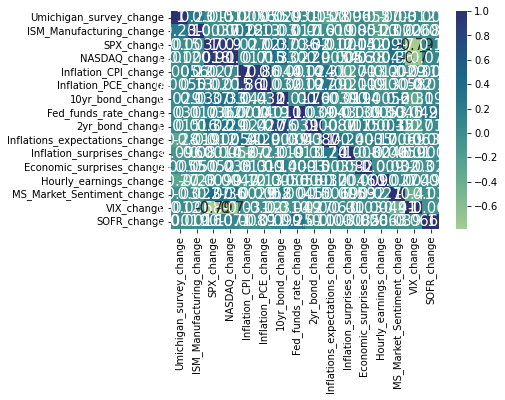

In [ ]:
import matplotlib.pyplot as mtb
import seaborn as sns

sns.heatmap(market_data_corrs, annot=True, annot_kws={'size': 15}, cmap='crest') 

mtb.show() 